# Проект - принятие решений в бизнесе

Я аналитик крупного интернет-магазина. Вместе с отделом маркетинга я подготовила список гипотез для увеличения выручки.
Приоритизируем гипотезы, запустим A/B-тест и проанализирум результаты. 


**План работы:**

1  Загрузим данные и подготовим их к анализу:\
1.1  Откроем файл с данными и изучем общую информацию;\
1.2  Проведем предобработку данных.\
2  Приоритизация гипотез:\
2.1  Фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета;\
2.2  Фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета;\
2.3  Изменение приоритизаций гипотез при применении RICE вместо ICE. Выводы.\
3  Анализ A/B-теста:\
3.1  Построим график кумулятивной выручки по группам. Выводы и предположения;\
3.2  Построим график кумулятивного среднего чека по группам. Выводы и предположения;\
3.3  Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Выводы и предположения;\
3.4  Построим график кумулятивного среднего количества заказов на посетителя по группам. Выводы и предположения;\
3.5  Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Выводы и предположения;\
3.6  Построим точечный график количества заказов по пользователям. Выводы и предположения;\
3.7  Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей;\
3.8  Построим точечный график стоимостей заказов. Выводы и предположения;\
3.9  Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов;\
3.10  Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Выводы и предположения;\
3.11  Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Выводы и предположения;\
3.12  Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Выводы и предположения;\
3.13  Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Выводы и предположения;\
3.14  Примим решение по результатам теста и объясним его.

##  Загрузим данные и подготовим их к анализу
  ### Откроем файл с данными и изучем общую информацию
   

In [1]:
#импортируем библиотеку pandas, matplotlib, datetime, seaborn, numpy, scipy.stats
import pandas as pd
from datetime import datetime, timedelta
import scipy.stats as stats
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#загрузим датасеты
#укажем два пути к файлу в случае ошибки 
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')  # гипотезы
except:
    hypothesis = pd.read_csv("https://code.s3.yandex.net/datasets/hypothesis.csv")

In [3]:
try:
    orders = pd.read_csv('/datasets/orders.csv')  # заказы
except:
    orders = pd.read_csv("https://code.s3.yandex.net/datasets/orders.csv")

In [4]:
try:
    visitors = pd.read_csv('/datasets/visitors.csv')  # пользователи
except:
    visitors = pd.read_csv("https://code.s3.yandex.net/datasets/visitors.csvv")

In [5]:
#создадим список с датасетами
df_list = [hypothesis, orders, visitors]
#присвоим имена датасетам
hypothesis.name =  'hypothesis'
orders.name = 'orders'
visitors.name = 'visitors'

In [6]:
#выведем первые 10 строчек датасетов на экран и выведем основную информацию с помощью метода info()
for df in df_list:
    print(f'\n Первые 10 строчек датасета {df.name}')
    display(df.head(10))
    print(f'\n Основная информация о датасете {df.name}')
    df.info() 


 Первые 10 строчек датасета hypothesis


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5



 Основная информация о датасете hypothesis
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes

 Первые 10 строчек датасета orders


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B



 Основная информация о датасете orders
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB

 Первые 10 строчек датасета visitors


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406



 Основная информация о датасете visitors
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


В датасетах `hypothesis` и `orders` необходимо исправить название столбов, привести их к нижнему регистру и к змеиному виду.\
Все данные о времени в формате object в датасетах `visitors` и `orders` необходимо преобразовать в формат даты.\
Пропусков в столбцах нет, необходимо проверить датасеты на дубликаты.

### Предобработка данных

In [7]:
#приведем столбцы датасета hypothesis к нижнему регистру
hypothesis.columns = hypothesis.columns.str.lower()

In [8]:
#приведем столбцы orders к змеиному регистру
orders = orders.rename(columns = {'transactionId':'transaction_id', 'visitorId':'visitor_id'})

In [9]:
# преобразуем данные о времени
visitors['date'] = pd.to_datetime(visitors['date'])
orders['date'] = pd.to_datetime(orders['date'])

In [10]:
#выведем количество пропущенных значений в датасетах для каждого столбца
#и поищем количество одинаковых строк
for df in df_list:
    print(f'\n Количество пропущенных значений в датасете {df.name}')
    display(df.isna().sum())
    print(f'\n Количество одинаковых строк в датасете {df.name}')
    display(df.duplicated().sum())


 Количество пропущенных значений в датасете hypothesis


hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64


 Количество одинаковых строк в датасете hypothesis


0


 Количество пропущенных значений в датасете orders


transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64


 Количество одинаковых строк в датасете orders


0


 Количество пропущенных значений в датасете visitors


date        0
group       0
visitors    0
dtype: int64


 Количество одинаковых строк в датасете visitors


0

В результате предобработки были переименованы столбцы (все буквы в названиях привели к нижнеми регистру, добавили нижнее подчеркивание), привели тип данных object в формат времени.
Еще раз убедились, что датафреймы не имеют пропуски и одинаковых строк.


Изучим составы групп при проведении А/В-теста.


In [11]:
total_ord = orders['visitor_id'].count()
f'Общее количество пользователей при проведениии А/В-теста - {total_ord} пользователей.'

'Общее количество пользователей при проведениии А/В-теста - 1197 пользователей.'

In [12]:
uniq_ord = orders['visitor_id'].nunique()
f'Уникальное количество пользователей при проведениии А/В-теста - {uniq_ord} пользователей.'

'Уникальное количество пользователей при проведениии А/В-теста - 1031 пользователей.'

In [13]:
nuniqueA = orders.query('group == "A"')['visitor_id'].nunique()
print(f'Уникальное количество пользователей группы А при проведениии А/В-теста - {nuniqueA} пользователей.')
total_ordA = orders.query('group == "A"')['visitor_id'].count()
f'Общее количество пользователей группы А при проведениии А/В-теста - {total_ordA} пользователей.'

Уникальное количество пользователей группы А при проведениии А/В-теста - 503 пользователей.


'Общее количество пользователей группы А при проведениии А/В-теста - 557 пользователей.'

In [14]:
nuniqueB = orders.query('group == "B"')['visitor_id'].nunique()
print(f'Уникальное количество пользователей группы B при проведениии А/В-теста - {nuniqueB} пользователей.')
total_ordB = orders.query('group == "B"')['visitor_id'].count()
f'Общее количество пользователей группы B при проведениии А/В-теста - {total_ordB} пользователей.'

Уникальное количество пользователей группы B при проведениии А/В-теста - 586 пользователей.


'Общее количество пользователей группы B при проведениии А/В-теста - 640 пользователей.'

Количество пользователей пересекается, проверим это следующим способом.

Создадим 2 таблицы, разделив пользователей по группам теста: А и В (`test_a` и `test_b`).\
Создадим пустой список `test`, в который будем сохранять `visitor_id`, попадающий в группу А и В.\
Затем с помощью `query` отберем пользователей не из списка `test`, и перезапишем таблицу `orders`.

In [15]:
test_a = orders.query('group == "A"')['visitor_id']
test_b = orders.query('group == "B"')['visitor_id']

In [16]:
test = []
for a in test_a:
    for b in test_b:
        if a == b:
            test.append(a)

In [17]:
test_a

2       4069496402
7         78758296
8        295230930
10       879864040
12      3213223594
           ...    
1187     132143192
1188    1022829655
1193     370388673
1194     573423106
1195    1614305549
Name: visitor_id, Length: 557, dtype: int64

In [18]:
orders = orders.query('visitor_id not in @test')

## Приоритизация гипотез
В файле `/datasets/hypothesis.csv` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
### Фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета

In [19]:
# Посчитаем ICE для гипотез
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']).round(1)
# Отсортируем гипотезы по убыванию приоритета
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).round(1)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.2
0,"Добавить два новых канала привлечения трафика,...",13.3
7,Добавить форму подписки на все основные страни...,11.2
6,Показать на главной странице баннеры с актуаль...,8.0
2,Добавить блоки рекомендаций товаров на сайт ин...,7.0
1,"Запустить собственную службу доставки, что сок...",2.0
5,"Добавить страницу отзывов клиентов о магазине,...",1.3
3,"Изменить структура категорий, что увеличит кон...",1.1
4,"Изменить цвет фона главной страницы, чтобы уве...",1.0


In [20]:
# вывод таблицы с отображением всего столбца
pd.set_option('display.max_colwidth', 0)

Наиболее перспективные по фреймворку ICE гипотезы: 8, 0, 7, 6 и 2.

### Фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета

In [21]:
# Посчитаем RICE для гипотез
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
# Отсортируем гипотезы по убыванию приоритета
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


И снова наиболее перспективные по фреймворку RICE гипотезы: 7, 2, 0, 6 и 8.

###  Изменение приоритизаций гипотез при применении RICE вместо ICE. Выводы

In [22]:
hypothesis

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3,4.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,16.2


По обоим фреймворкам самыми перспективными гипотезами оказались одни и те же гипотезы **0, 2, 6, 7, 8**. Однако из-за высокого параметра охвата пользователей **Reach у гипотезы 7**, она становится первой во фреймворке RICE.\
**Гипотеза 7** `Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок`из-за охвата всех пользователей (параметр 10), довольно высоких показателей изменения пользовательского опыта Impact и уверенности в этом изменении Confidence (7 и 8) и среднего показателя стоимости введения этой гипотезы Efforts (5), является наиболее эффективной.\
**Гипотеза 8** `Запустить акцию, дающую скидку на товар в день рождения` несмотря на первое место в рейтинге ICE имеет наиболее низкий охват пользователей (1) из-за применения данной акции только 1 раз в год.

## Анализ A/B-теста
Мы провели A/B-тест и получили результаты, которые описаны в файлах `/datasets/orders.csv` и `/datasets/visitors.csv`.

Теперь необходимо проанализировать A/B-тест.
### Построим график кумулятивной выручки по группам. Выводы и предположения

Чтобы исключить проблему подсматривания, анализируют графики метрик.\
Изучают графики кумулятивных, или накапливаемых данных. По центральной предельной теореме значение кумулятивных метрик часто сходится и устанавливается около некоторого среднего. Тогда по графику кумулятивных метрик определяют, стоит останавливать тест или нет. 

In [23]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5) 

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


Построим графики кумулятивной выручки по дням и группам A/B-тестирования.

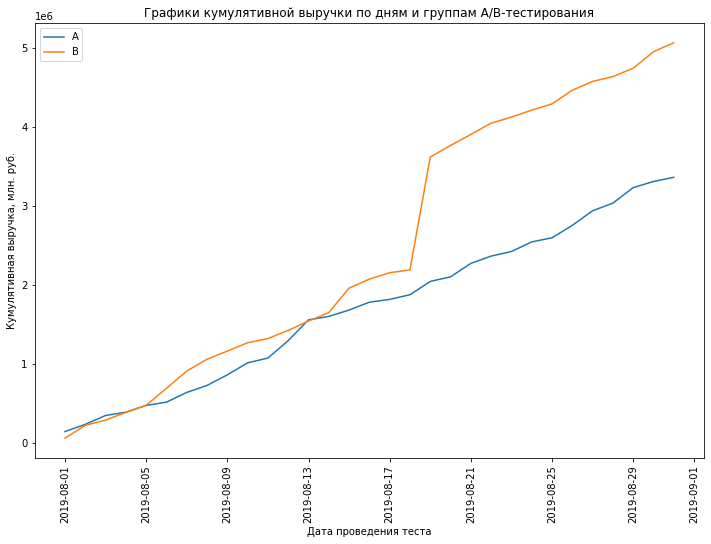

In [24]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.figure(figsize=(12, 8))
plt.xlabel('Дата проведения теста')
plt.ylabel('Кумулятивная выручка, млн. руб.')
plt.title('Графики кумулятивной выручки по дням и группам A/B-тестирования')
plt.xticks(rotation=90, fontsize='10')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()

Выручка почти равномерно увеличивалась до середины теста. Но затем сегмент В значительно вырос по сравнению с сегментом А и вырвался вперед.\
Также график выручки группы В в одной точке резко растет.\
Эти признаки могут сигнализировать о всплесках числа заказов, либо о появлении аномально дорогих заказов в выборке. Такие выбросы необходимо удалить при заключительном анализе.

### Построим график кумулятивного среднего чека по группам. Выводы и предположения


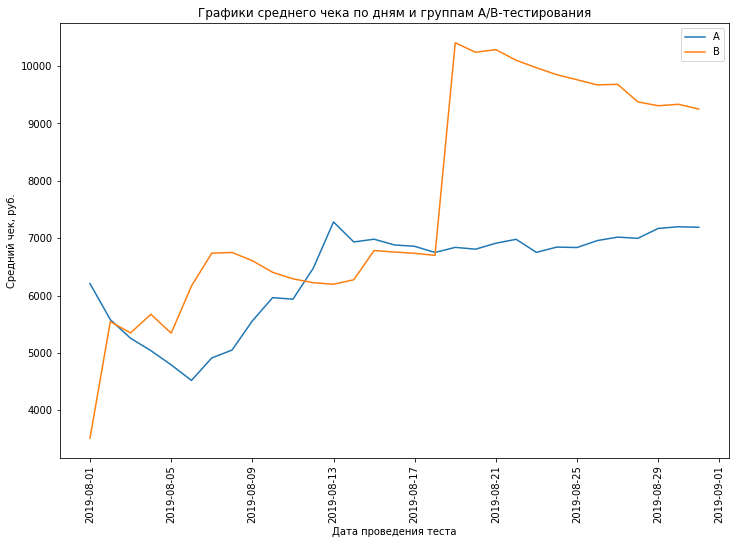

In [25]:
# Строим график среднего чека группы А
plt.figure(figsize=(12, 8))
plt.xlabel('Дата проведения теста')
plt.ylabel('Средний чек, руб.')
plt.title('Графики среднего чека по дням и группам A/B-тестирования')
plt.xticks(rotation=90, fontsize='10')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
# Строим график среднего чека группы В
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 

Кумулятивное значение среднего чека по сегментам продолжает колебаться. Однако средний чек сегмента А становится равномерным ближе к концу теста. У сегмента В после резкого подъема в середине теста средний чек к концу теста падает.\
Возможно, в группу B в попали крупные заказы (резкий всплеск на графике). Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.\
Или требуется дополнительный анализ выбросов, которые так сильно искажают результаты.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Выводы и предположения

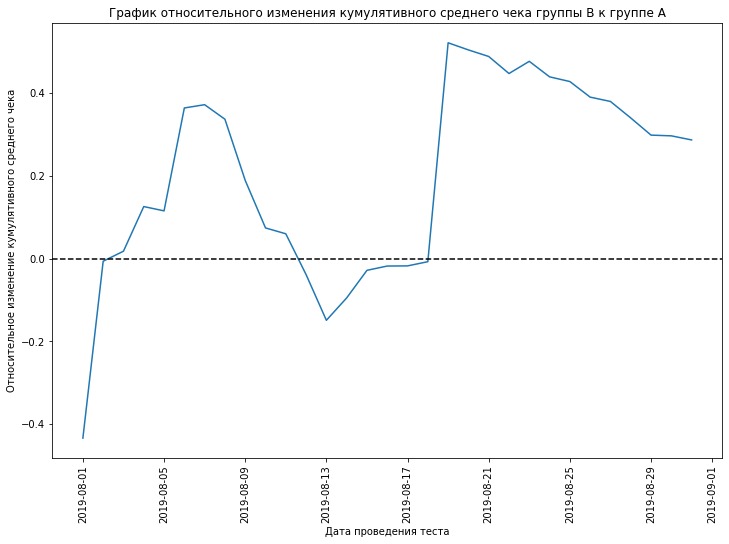

In [26]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA\
    .merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(12, 8))
plt.xlabel('Дата проведения теста')
plt.ylabel('Относительное изменение кумулятивного среднего чека')
plt.xticks(rotation=90, fontsize='10')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

В нескольких точках график различия между сегментами резко «скачет». Видимо, именно тогда были совершены аномальные заказы.\
Какие-либо выводы по данному графику делать рано.

### Построим график кумулятивного среднего количества заказов на посетителя по группам. Выводы и предположения

Построим графики кумулятивного среднего количества заказов на посетителя по дням и группам A/B-тестирования, используя данные из `cumulativeData`

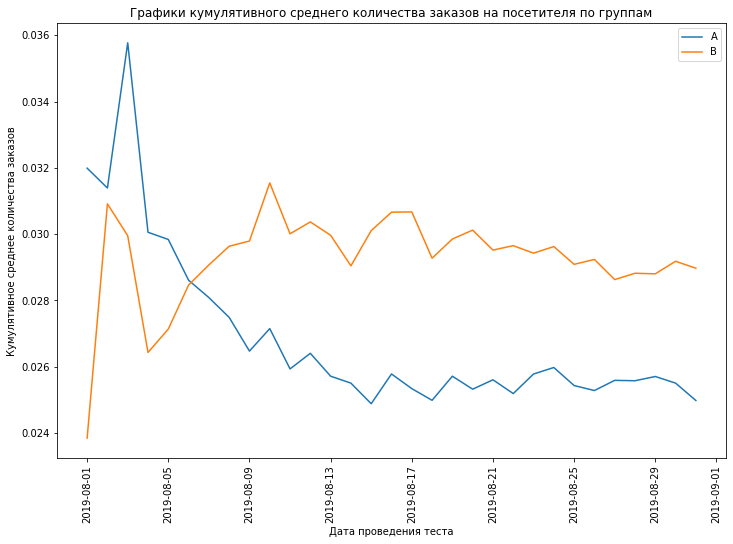

In [27]:
# датафрейм с кумулятивным количеством заказов и посетителями по дням в группе А
cumulativeOrdersA = cumulativeData[cumulativeData['group']=='A'][['date', 'orders', 'visitors']]

# датафрейм с кумулятивным количеством заказов и посетителями по дням в группе B
cumulativeOrdersB = cumulativeData[cumulativeData['group']=='B'][['date', 'orders', 'visitors']]

# Строим график среднего количества заказов группы А
plt.figure(figsize=(12, 8))
plt.xlabel('Дата проведения теста')
plt.ylabel('Кумулятивное среднее количества заказов')
plt.xticks(rotation=90, fontsize='10')
plt.title('Графики кумулятивного среднего количества заказов на посетителя по группам')
plt.plot(cumulativeOrdersA['date'], cumulativeOrdersA['orders'] / cumulativeOrdersA['visitors'], label='A')

# Строим график среднего количества заказов группы B
plt.plot(cumulativeOrdersB['date'], cumulativeOrdersB['orders'] / cumulativeOrdersB['visitors'], label='B')

plt.legend()

Кумулятивное значение среднего количества заказов на посетителя по сегментам имеет резкий всплеск в начале у обеих групп. Возможно, в первой половине теста имели место частые заказы или количество поситителей было меньше, чем в дальнейшем.\
Однако значение среднего количества заказов на посетителя сегмента В превышает сегмент А после стабилизации всплесков, но к концу теста оба значения имеют перспективу к уменьшению.\
Это говорит о том, что требуется более тщательно проверить выбросы при дальнейшем анализе.


### Построим  график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Выводы и предположения

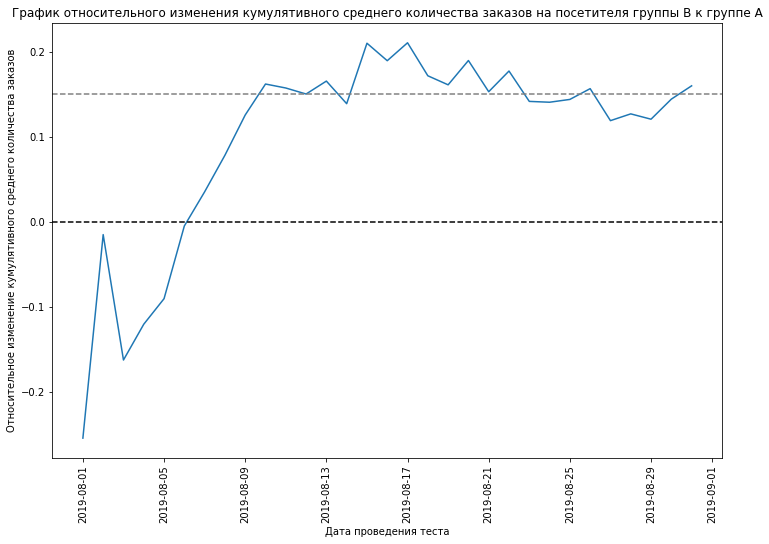

In [28]:
# собираем данные в одном датафрейме
mergedCumulativeOrders = cumulativeOrdersA\
    .merge(cumulativeOrdersB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение среднего количества заказов на посетителя
plt.figure(figsize=(12, 8))
plt.xlabel('Дата проведения теста')
plt.ylabel('Относительное изменение кумулятивного среднего количества заказов')
plt.xticks(rotation=90, fontsize='10')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.plot(mergedCumulativeOrders['date'], 
         (mergedCumulativeOrders['ordersB']/mergedCumulativeOrders['visitorsB'])
         /(mergedCumulativeOrders['ordersA']/mergedCumulativeOrders['visitorsA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.axhline(y=0.15, color='grey', linestyle='--')

В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд. Потом по графику относительное изменение немного упало, но к концу оно постепенно растёт.\
Группа В показывает относительное изменение кумулятивного среднего количества заказов на посетителя в среднем на 15 % лучше группы А.

### Построим точечный график количества заказов по пользователям. Выводы и предположения

Изучим данные о заказах из датафрейма `orders`.\
Подсчитаем количество заказов по пользователям и посмотрим на результат:

In [29]:
# Подсчитаем количество заказов по пользователям
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
# Переименуем столбцы
ordersByUsers.columns = ['visitor_id', 'orders']
# Отсортируем ordersByUsers по заказам
ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,visitor_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


В первой десятке пользователи, которые совершали от 2 до 3 заказов. Значительно больше, чем обычный пользователь за неделю.
Построим гистрограмму распределения количества заказов на одного пользователя.

(array([937.,   0.,   0.,   0.,   0.,  29.,   0.,   0.,   0.,   7.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

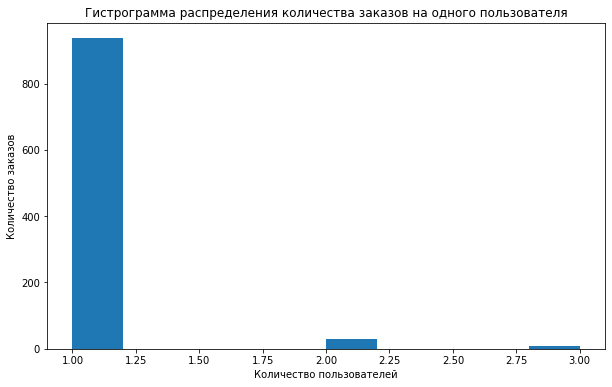

In [30]:
plt.figure(figsize=(10, 6))
plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов')
plt.title('Гистрограмма распределения количества заказов на одного пользователя')
plt.hist(ordersByUsers['orders']) 

Большинство покупателей заказывали только один раз. Но существует доля пользователей с 2-3 заказами.\
Построим точечную диаграмму числа заказов на одного пользователя:

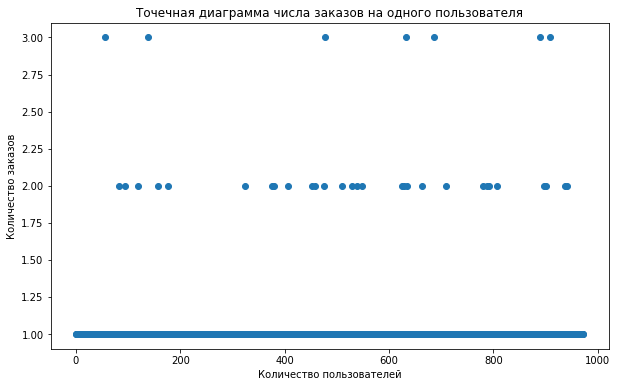

In [31]:
# сгенерируем номера наблюдений
x_values = pd.Series(range(0,len(ordersByUsers)))
# Построим точечную диаграмму
plt.figure(figsize=(10, 6))
plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов')
plt.title('Точечная диаграмма числа заказов на одного пользователя')
plt.scatter(x_values, ordersByUsers['orders']) 

Выводы подтверждаются: много пользователей с 2-3 заказами. Их точная доля не ясна — непонятно, считать их аномалиями или нет.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей

In [32]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

Не более 1% пользователей оформляли больше чем 2 заказа.\
Разумно выбрать 2 и более заказов на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.

### Построим точечный график стоимостей заказов. Выводы и предположения

Исследуем аномально дорогие заказы, анализ самых дешёвых заказов из-за их маленькой стоимости анализировать не будем. 


In [33]:
orders.sort_values(by='revenue', ascending=False).head(10)

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A
949,1347999392,887908475,2019-08-21,60450,A
940,2420050534,4003628586,2019-08-08,58550,B
131,3163614039,2254586615,2019-08-22,53904,A


Среди самых дорогих заказов цены заказов находятся в диапазоне от 53 904 до 1 294 500 рублей. Если такой дорогой заказ попадёт в одну из групп теста, он сразу же исказит результаты и сделает победителем ту группу, где оказался.

Построим точечную диаграмму распределения стоимостей заказов: 

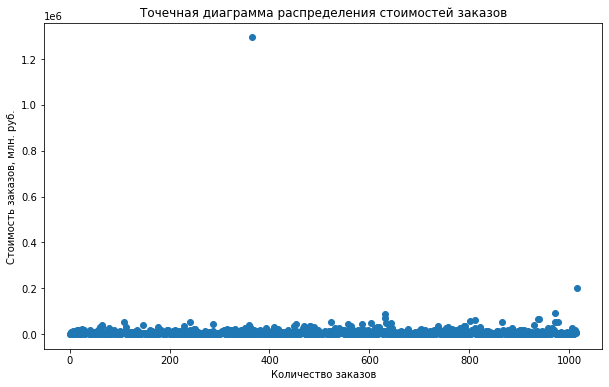

In [34]:
# сгенерируем номера наблюдений
x_values = pd.Series(range(0,len(orders['revenue'])))
# Построим точечную диаграмму
plt.figure(figsize=(10, 6))
plt.xlabel('Количество заказов')
plt.ylabel('Стоимость заказов, млн. руб.')
plt.title('Точечная диаграмма распределения стоимостей заказов')
plt.scatter(x_values, orders['revenue']) 

По точечносу графику видно, что дорогих заказов совсем немного. По графику можно выбрать приблизительную границу аномальных заказов более 50 000 рублей.

In [35]:
# уберем 2 выброса с выручкой свыше 200 000 рублей
ord_clean = orders.query('revenue < 200000')['revenue']

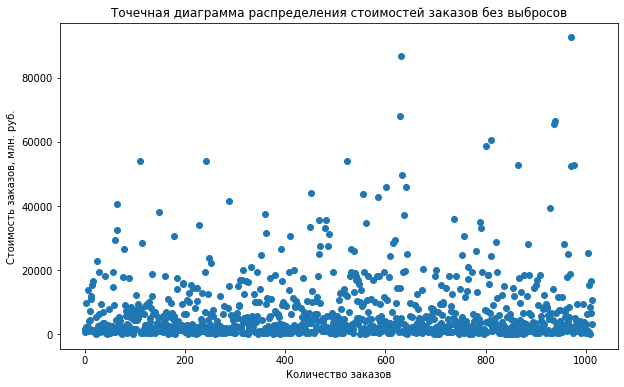

In [36]:
# сгенерируем номера наблюдений
x_values = pd.Series(range(0,len(ord_clean)))
# Построим точечную диаграмму
plt.figure(figsize=(10, 6))
plt.xlabel('Количество заказов')
plt.ylabel('Стоимость заказов, млн. руб.')
plt.title('Точечная диаграмма распределения стоимостей заказов без выбросов')
plt.scatter(x_values, ord_clean) 

Теперь по точечносу графику лучше видно, что дорогие заказы кроме двух выбросов свыше 200 000 рублей в основном свыше 60 000 рублей. По графику можно выбрать приблизительную границу аномальных заказов более 60 000 рублей.\
Посчитаем 95-й и 99-й перцентили стоимости заказов для боле точного определения границы аномальных значений стоимости заказа. 

### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [37]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Не более 5% заказов дороже 26 785 рублей и не более 1% дороже 53 904 рублей.\
Выберем 28 000 рублей и более за верхнюю границу стоимости заказа, и отсеем аномальных пользователей по ней.


### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Выводы и предположения

Посчитаем статистическую значимость различий в среднем количестве заказов на пользователя между группами по «сырым» данным — без удаления аномальных пользователей.\
Сформулируем гипотезы. **Нулевая: различий в среднем количестве заказов между группами по «сырым» данным нет. Альтернативная: различия в среднем между группами по «сырым» данным есть**.

In [38]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

Посчитаем статистическую значимость различия в среднем количестве заказов между группами.\
Создадим переменные ordersByUsersA и ordersByUsersB. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

In [39]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders'] 

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [40]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
              visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("p-value = {0:.3f} -  статистическая значимость различий в среднем количестве заказов на пользователя по сырым данным."\
      .format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.1%} относительный прирост среднего группы В к конверсии группы А по сырым данным."\
      .format(sampleB.mean() / sampleA.mean() - 1))

p-value = 0.011 -  статистическая значимость различий в среднем количестве заказов на пользователя по сырым данным.
16.0% относительный прирост среднего группы В к конверсии группы А по сырым данным.


P-value меньше 0.05, поэтому нулевую гипотезу отвергаем. Анализ сырых данных говорит о том, что в среднем количестве заказов между группамми есть статистически значимые различия. Относительный прирост среднего группы В к конверсии группы А равен 16 %.\
Необходимо сравнить средние чеки по сырым данным, а затем обе метрики еще раз после удаления аномальных значений.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Выводы и предположения

Теперь проверим статистическую значимость различий в среднем чеке между сегментами. **Нулевая гипотеза: различий в среднем чеке между группами по "сырым" данным нет. Альтернативная гипотеза: различия в среднем чеке между группами по "сырым" данным есть**.\
Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов.\
А ещё найдём относительные различия в среднем чеке между группами:

In [41]:
print('p-value = {0:.3f} -  статистическая значимость различий в среднем чеке заказа между группами по сырым данным.'\
      .format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.1%} относительный прирост среднего группы В к конверсии группы А по сырым данным.'\
      .format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value = 0.829 -  статистическая значимость различий в среднем чеке заказа между группами по сырым данным.
28.7% относительный прирост среднего группы В к конверсии группы А по сырым данным.


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.\
Впрочем, средний чек группы B выше среднего чека группы A аж на 28,7 %!

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Выводы и предположения

Сформулируем гипотезы. **Нулевая: различий в среднем количестве заказов между группами по «очищенным» данным нет. Альтернативная: различия в среднем между группами по «очищенным» данным есть**.\
Примем за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 28 000 рублей. Так мы уберём 1% пользователей с наибольшим числом заказов и 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 1 — `usersWithManyOrders` и пользователей, совершивших заказы дороже 28 000 — `usersWithExpensiveOrders`. Объединим их в таблице `abnormalUsers`. \
Узнаем, сколько всего аномальных пользователей атрибутом `shape`.

In [42]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 1]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 1]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099    148427295
928     204675465
33      249864742
684     358944393
36      366673373
Name: visitor_id, dtype: int64
83


Всего 83 аномальных пользователей.\
Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [43]:
 sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [44]:
# Применим статистический критерий Манна-Уитни к полученным выборкам
print('p-value = {0:.3f} -  статистическая значимость различий в среднем количестве заказов на пользователя по очищенным данным.'\
      .format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.1%} относительный прирост среднего группы В к конверсии группы А по очищенным данным.'\
      .format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value = 0.012 -  статистическая значимость различий в среднем количестве заказов на пользователя по очищенным данным.
18.1% относительный прирост среднего группы В к конверсии группы А по очищенным данным.


Результаты по среднему количеству заказов практически не изменились. Из этого следует, что статистическая значимость достигнута, нулевую гипотезу отвергаем. Сегмент В значительно лучше сегмента А.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Выводы и предположения

Проверим, произошло ли что-нибудь с результатами по среднему чеку.\
Сформируем гипотезы. **Нулевая гипотеза: различий в среднем чеке между группами по "очищенным" данным нет. Альтернативная гипотеза: различия в среднем чеке между группами по "очищенным" данным есть**.

In [45]:
print(
    'p-value = {0:.3f} -  статистическая значимость различий в среднем чеке заказа между группами по очищенным данным.'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.1%} относительный снижение среднего группы В к конверсии группы А по очищенным данным.".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p-value = 0.851 -  статистическая значимость различий в среднем чеке заказа между группами по очищенным данным.
-0.6% относительный снижение среднего группы В к конверсии группы А по очищенным данным.


P-value увеличился, и после удаления аномальных значений среднего чека разница между сегментами стала практически нулевой.\
Но  отвергать нулевую гипотезу нельзя.\
Хотя общие выводы по результатам теста не изменились, но аномальные значения повлияли на результаты A/B-теста.


### Примим решение по результатам теста и объясним его

Какие выводы по тесту можем сделать?
Имеющиеся факты:
- Есть статистически значимое различие по среднему количеству заказов между группами как по сырым данным, так и после фильтрации аномалий;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- График различия среднего количества заказов между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения.
- График различия среднего чека колеблется: он-то и позволил найти аномалии. Сделать из этого графика определённые выводы нельзя.

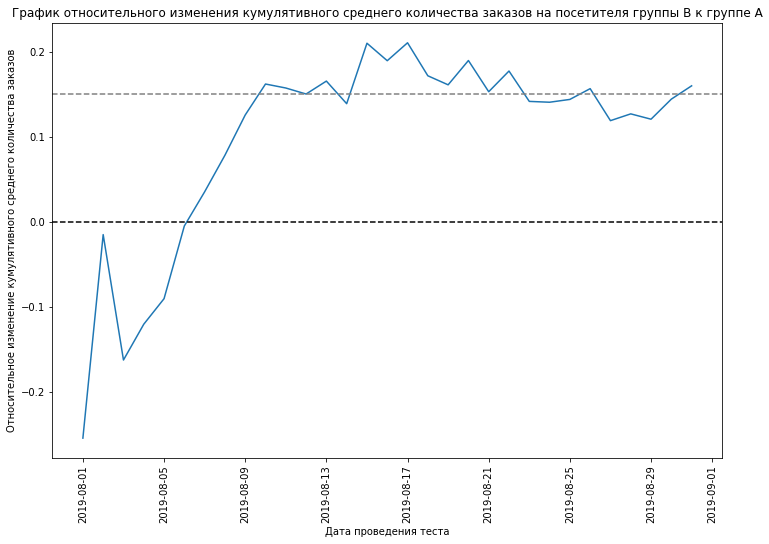

In [46]:
# собираем данные в одном датафрейме
mergedCumulativeOrders = cumulativeOrdersA\
    .merge(cumulativeOrdersB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение среднего количества заказов на посетителя
plt.figure(figsize=(12, 8))
plt.xlabel('Дата проведения теста')
plt.ylabel('Относительное изменение кумулятивного среднего количества заказов')
plt.xticks(rotation=90, fontsize='10')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.plot(mergedCumulativeOrders['date'], 
         (mergedCumulativeOrders['ordersB']/mergedCumulativeOrders['visitorsB'])
         /(mergedCumulativeOrders['ordersA']/mergedCumulativeOrders['visitorsA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.axhline(y=0.15, color='grey', linestyle='--')

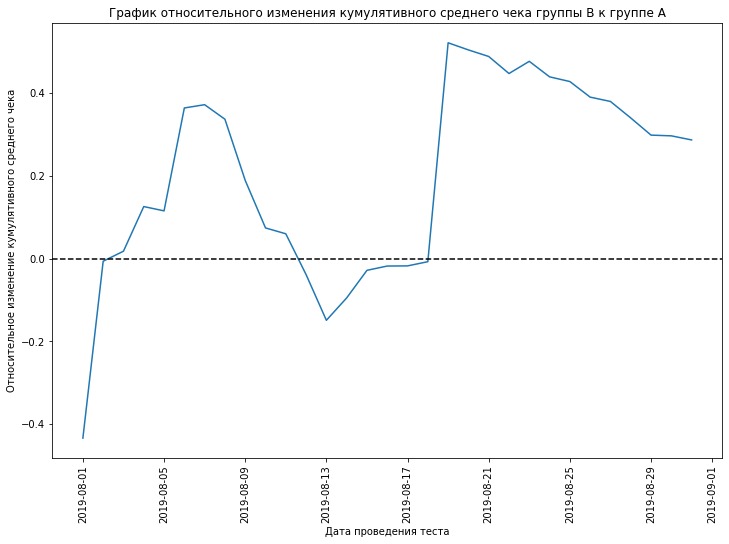

In [47]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA\
    .merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(12, 8))
plt.xlabel('Дата проведения теста')
plt.ylabel('Относительное изменение кумулятивного среднего чека')
plt.xticks(rotation=90, fontsize='10')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

Исходя из обнаруженных фактов, **тест следует продолжить**. Вероятность, что при имеющихся данных сегмент B на самом деле лучше сегмента A — есть, осталось только достигнуть статистическую значимость по среднему чеку.